<a href="https://colab.research.google.com/github/stefanoridolfi/Coding_ML/blob/master/MLP_1_hidden_3_output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

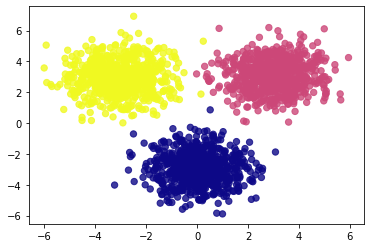

In [56]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

cat_images = np.random.randn(700, 2) + np.array([0, -3])
mouse_images = np.random.randn(700, 2) + np.array([3, 3])
dog_images = np.random.randn(700, 2) + np.array([-3, 3])
feature_set = np.vstack([cat_images, mouse_images, dog_images])
labels = np.array([0]*700 + [1]*700 + [2]*700)
one_hot_labels = np.zeros((2100, 3))
for i in range(2100):
    one_hot_labels[i, labels[i]] = 1

a=np.random.randn(4, 2)
b=np.array([0,3])
l=np.array([0]*7 + [1]*7 + [2]*7)
o=np.zeros((21, 3))
for i in range(21):
    o[i, l[i]] = 1
#print("\n",o)
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels,cmap='plasma', s=40, alpha=0.8)
plt.show()